In [ ]:
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy import vstack
from numpy.random import randn
from numpy.random import randint
from keras.datasets.mnist import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
import keras
import tensorflow as tf

In [ ]:
(X_train, _), (_, _) = load_data()
X_train = X_train.astype('float32')
# scale from [0,255] to [0,1]
X_train = X_train / 255.0
X_train = X_train.reshape(-1, 28, 28, 1) * 2. - 1.

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
codings_size = 100

generator = keras.models.Sequential([
keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
keras.layers.Reshape([7, 7, 128]),
keras.layers.BatchNormalization(),
keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
activation="selu"),
keras.layers.BatchNormalization(),
keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
activation="tanh")
])


discriminator = keras.models.Sequential([
keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="same",
activation=keras.layers.LeakyReLU(0.2),
input_shape=[28, 28, 1]),
keras.layers.Dropout(0.4),
keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="same",
activation=keras.layers.LeakyReLU(0.2)),
keras.layers.Dropout(0.4),
keras.layers.Flatten(),
keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [ ]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [ ]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=20):
  generator, discriminator = gan.layers
  for epoch in range(n_epochs):
    print(epoch)
    for X_batch in dataset:
      # phase 1 - training the discriminator
      noise = tf.random.normal(shape=[batch_size, codings_size])
      generated_images = generator(noise)
      X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
      y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
      discriminator.trainable = True
      discriminator.train_on_batch(X_fake_and_real, y1)
      # phase 2 - training the generator
      noise = tf.random.normal(shape=[batch_size, codings_size])
      y2 = tf.constant([[1.]] * batch_size)
      discriminator.trainable = False
      gan.train_on_batch(noise, y2)
train_gan(gan, dataset, batch_size, codings_size)

0


KeyboardInterrupt: 

In [ ]:
noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)

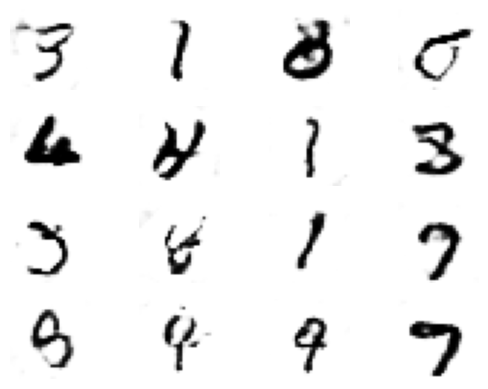

In [ ]:
import matplotlib.pyplot as plt

def save_plot(examples, n):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
	pyplot.show()

save_plot(generated_images,4)